In [2]:
from comchoice.aggregate import divisiveness, win_rate, copeland, borda
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [5]:
# Parameters to get data stored on data/ folder.

method = "IC"
n_alternatives = 10
step = 6
voting = "borda"


df = pd.read_csv(f"data/experiment_3_method_{method}_profile_100_step_{step}_{voting}.csv")
df = df[df["n_alternatives"] == n_alternatives]
df["percentage"] = (df["size"] - 100) / 100

df = df[df["starting_id"] == n_alternatives]
df.head()

,alternative,value,rank,size,iteration,custom_id,alternative_of_interest,starting_id,type,n_alternatives,method,voting,step,percentage
22000,8,0.479144,1,100,0,1,False,10,IC,10,IC,borda,6,0.0
22001,9,0.427170,2,100,0,2,False,10,IC,10,IC,borda,6,0.0
22002,4,0.416132,3,100,0,3,False,10,IC,10,IC,borda,6,0.0
22003,5,0.410426,4,100,0,4,False,10,IC,10,IC,borda,6,0.0
22004,6,0.409716,5,100,0,5,False,10,IC,10,IC,borda,6,0.0


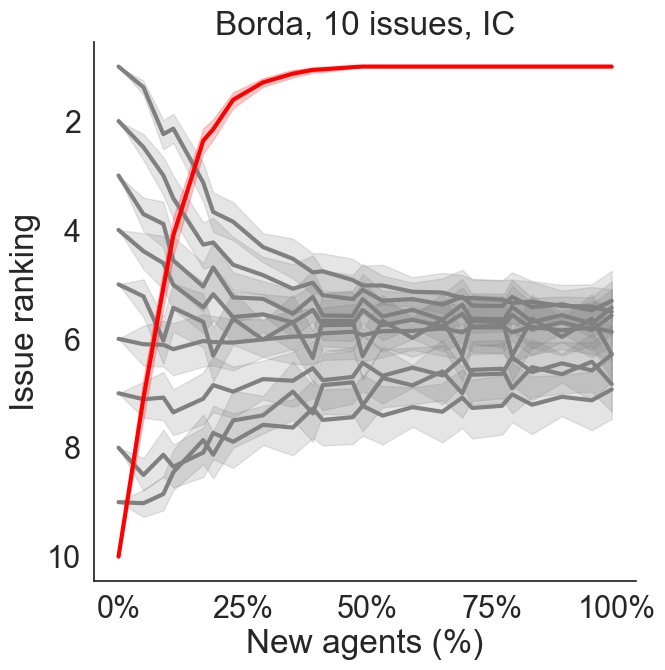

In [6]:
sns.set(font_scale=2, style="white")
fig, ax = plt.subplots(figsize=(7, 7))
palette = {c:"red" if c==n_alternatives else "grey" for c in df.custom_id.unique()}

g = sns.lineplot(
    x="percentage",
    y="rank",
    palette=palette,
    hue="custom_id",
    lw=3,
    data=df,
    legend=False,
    ax=ax
)

ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
ax.set_xlabel("New agents (%)")
ax.set_ylabel("Issue ranking")
ax.set_title(f"{voting.title()}, {n_alternatives} issues, {method}")
ax.invert_yaxis()
sns.despine()